# Budget Tracker

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# OOPS -->
class Expense:       # making a class for storing data
    def __init__(self,amount,date,category,description):
        self.amount=amount
        self.date=date
        self.category=category
        self.description=description

In [3]:


class BudgetManager:
    def __init__(self):
        self.expenses = []

    def add_expense(self, expense):
        self.expenses.append(expense)

    def to_dataframe(self):
        data = [{
            'Amount': e.amount,
            'Category': e.category,
            'Date': e.date,
            'Description': e.description
        } for e in self.expenses]
        return pd.DataFrame(data)


In [4]:
from datetime import datetime

manager = BudgetManager()

while True:
    amt = float(input("Enter amount: "))
    cat = input("Enter category (Food, Travel, etc.): ")
    date = input("Enter date (YYYY-MM-DD): ")
    desc = input("Enter description (optional): ")
    
    exp = Expense(amt, cat, date, desc)
    manager.add_expense(exp)
    
    more = input("Add another? (y/n): ")
    if more.lower() != 'y':
        break


In [5]:
df = manager.to_dataframe()
print("\nAll Expenses:\n", df)

# Optional: Save to CSV
df.to_csv("expenses.csv", index=False)



All Expenses:
     Amount    Category  Date Description
0  20000.0  2022-10-25  Food            


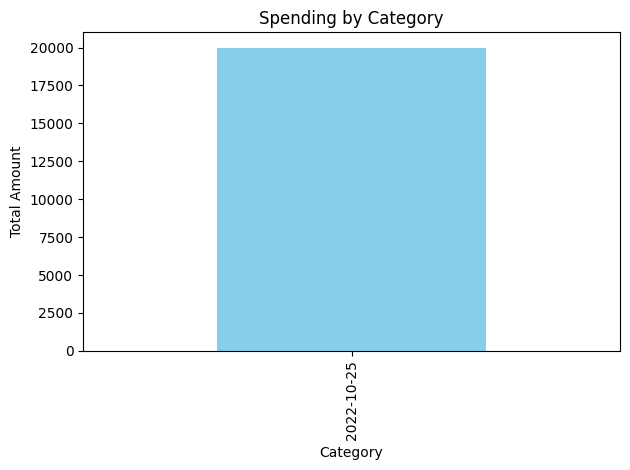

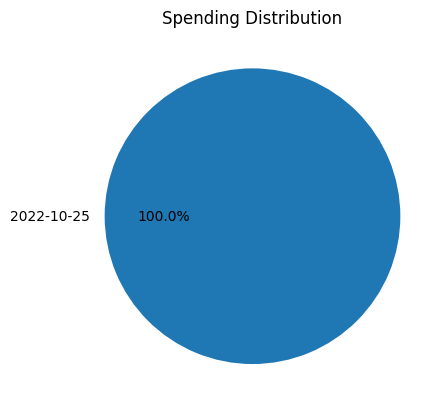

In [6]:


# Bar chart for category-wise spending
category_data = df.groupby("Category")["Amount"].sum()
category_data.plot(kind='bar', title="Spending by Category", color='skyblue')
plt.xlabel("Category")
plt.ylabel("Total Amount")
plt.tight_layout()
plt.show()

# Pie chart
category_data.plot.pie(autopct='%1.1f%%', title="Spending Distribution")
plt.ylabel("")
plt.show()
